In [1]:
import  tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import cv2 as cv
from collections import Counter
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework

In [2]:
import os

In [7]:
x=np.load('Dataset/all_7/x_train.npy')
y=np.load('Dataset/all_7/y_train.npy')
# x=[]
# y=[]
# c=0
# path='image_data/task7/after_augmentation'
# for image in os.listdir(os.path.join(path, 'no_damage')):
#     img=cv.imread(os.path.join(path,'no_damage', image),1)
#     x.append(img)
#     y.append(0)
#     c=c+1
# print("complete :", c)
# c=0
# for image in os.listdir(os.path.join(path, 'flexural')):
#     img=cv.imread(os.path.join(path,'flexural', image),1)
#     x.append(img)
#     y.append(1)
#     c=c+1
# print("complete :", c)
# c=0
# for image in os.listdir(os.path.join(path, 'shear')):
#     img=cv.imread(os.path.join(path,'shear', image),1)
#     x.append(img)
#     y.append(2)
#     c=c+1
# print("complete :", c)
# c=0
# for image in os.listdir(os.path.join(path, 'combined')):
#     img=cv.imread(os.path.join(path,'combined', image),1)
#     x.append(img)
#     y.append(3)
#     c=c+1
# print("complete :", c)
# x=np.array(x)
# y=np.array(y)

In [9]:
x.shape, y.shape

((2632, 224, 224, 3), (2632,))

In [10]:
x = tf.keras.applications.vgg16.preprocess_input(x)
x

array([[[[ -48.939003 ,  -55.779    ,  -51.68     ],
         [ -50.939003 ,  -57.779    ,  -53.68     ],
         [ -52.939003 ,  -59.779    ,  -55.68     ],
         ...,
         [ -85.939    , -102.779    , -110.68     ],
         [ -85.939    , -102.779    , -110.68     ],
         [ -85.939    , -102.779    , -110.68     ]],

        [[ -43.939003 ,  -50.779    ,  -46.68     ],
         [ -45.939003 ,  -52.779    ,  -48.68     ],
         [ -47.939003 ,  -54.779    ,  -50.68     ],
         ...,
         [ -84.939    , -101.779    , -109.68     ],
         [ -85.939    , -102.779    , -110.68     ],
         [ -85.939    , -102.779    , -110.68     ]],

        [[ -36.939003 ,  -43.779    ,  -39.68     ],
         [ -38.939003 ,  -45.779    ,  -41.68     ],
         [ -41.939003 ,  -48.779    ,  -44.68     ],
         ...,
         [ -84.939    , -101.779    , -109.68     ],
         [ -84.939    , -101.779    , -109.68     ],
         [ -84.939    , -101.779    , -109.68     ]],

In [11]:
Counter(y)

Counter({3: 524, 0: 1502, 2: 400, 1: 206})

In [12]:
for key, value in Counter(y).items():
    print(key, value/y.shape[0])

3 0.19908814589665655
0 0.5706686930091185
2 0.1519756838905775
1 0.07826747720364742


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


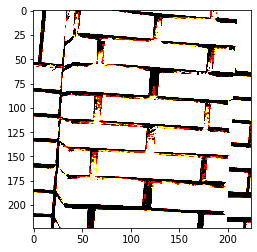

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


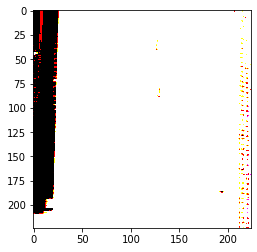

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


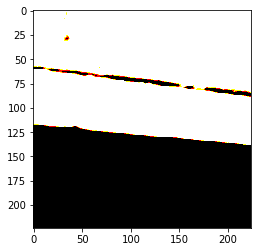

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


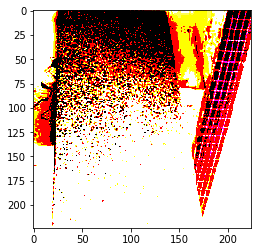

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


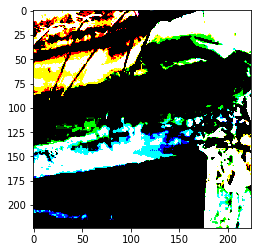

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


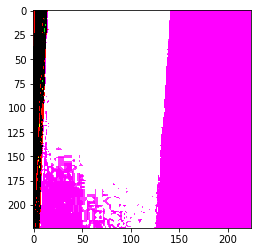

0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


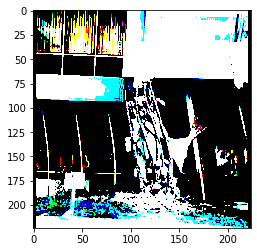

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


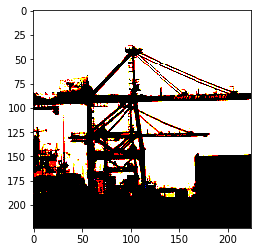

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


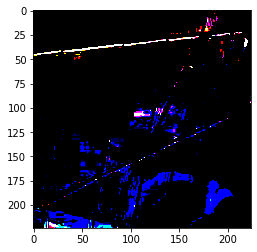

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


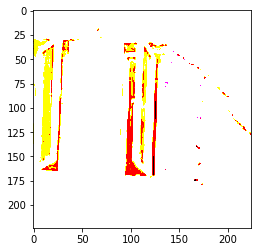

1


In [13]:
for i in range(10,20):
    plt.imshow(x[i])
    plt.show()
    print(y[i])

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10, shuffle=True)
x_train,x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.11, shuffle=True) 
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)
print("x_val :", x_val.shape)
print("y_val: ", y_val.shape)

x_train : (2107, 224, 224, 3)
y_train : (2107,)
x_test : (264, 224, 224, 3)
y_test : (264,)
x_val : (261, 224, 224, 3)
y_val:  (261,)


In [15]:
y_train=to_categorical(y_train, num_classes=4)
y_test=to_categorical(y_test, num_classes=4)
y_val=to_categorical(y_val, num_classes=4)

In [16]:
# x_train=x_train/255
# x_test=x_test/255
# x_val=x_val/255

In [17]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='densenet_weights_7.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.20,
    height_shift_range=0.20,
    horizontal_flip=True,
    zoom_range=0.15,
    vertical_flip=True,
    fill_mode='nearest')


In [18]:
image_height=224
image_width=224

In [19]:
from tensorflow.keras import backend as K

In [20]:
drop=0.3
#K.set_learning_phase(0)
densenet=tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None)
    #classes=4,
#densenet.trainable=False
# i=0
for layer in densenet.layers:
#     if i > 80:
#         break
    layer.trainable=False
#     i=i+1
    
# for layer in densenet.layers:
#     if "BatchNormalization" in layer.__class__.__name__:
#         layer.trainable = True

#K.set_learning_phase(1)
x=densenet.output
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(drop)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
p=tf.keras.layers.Dense(4,activation='softmax')(x)
model=tf.keras.Model(inputs=densenet.input, outputs=p)




print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

In [21]:
#opt=tf.keras.optimizers.Adam(lr=0.000055)
initial_learning_rate = 0.0001
def scheduler(epoch, lr):
    if epoch == 0:
        return lr
    if epoch % 10 == 0:
        return lr * 0.1
    else:
        return lr
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
opt=tf.keras.optimizers.Adam(lr=initial_learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [22]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=8, callbacks=[ lr_callback,model_checkpoint_callback], shuffle=True)

#history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=8), steps_per_epoch=len(x_train)/8, epochs=50, validation_data=(x_val,y_val), callbacks=[ model_checkpoint_callback], shuffle=True)#, class_weight=class_weights)

Train on 2107 samples, validate on 261 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
Epoch 1/30
2104/2107 [============================>.] - ETA: 0s - loss: 1.2215 - acc: 0.5214
Epoch 00001: val_acc improved from -inf to 0.62835, saving model to densenet_weights_7.h5
2107/2107 [==============================] - 44s 21ms/sample - loss: 1.2210 - acc: 0.5216 - val_loss: 1.0854 - val_acc: 0.6284

Epoch 00002: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
Epoch 2/30
2104/2107 [============================>.] - ETA: 0s - loss: 0.6012 - acc: 0.7856
Epoch 00002: val_acc did not improve from 0.62835
2107/2107 [==============================] - 36s 17ms/sample - loss: 0.6015 - acc: 0.7855 - val_loss: 1.0528 - val_acc: 0.6207

Epoch 00003: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
Epoch 3/30
2104/2107 [============================>.] - ETA: 0s - loss: 0.3772 - acc: 0.8869
Epoch 00003: val_acc impr


Epoch 00024: LearningRateScheduler reducing learning rate to 9.999999974752427e-07.
Epoch 24/30
2104/2107 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9824
Epoch 00024: val_acc did not improve from 0.64368
2107/2107 [==============================] - 53s 25ms/sample - loss: 0.0551 - acc: 0.9824 - val_loss: 1.3446 - val_acc: 0.6322

Epoch 00025: LearningRateScheduler reducing learning rate to 9.999999974752427e-07.
Epoch 25/30
2104/2107 [============================>.] - ETA: 0s - loss: 0.0420 - acc: 0.9895
Epoch 00025: val_acc did not improve from 0.64368
2107/2107 [==============================] - 49s 23ms/sample - loss: 0.0420 - acc: 0.9896 - val_loss: 1.3306 - val_acc: 0.6360

Epoch 00026: LearningRateScheduler reducing learning rate to 9.999999974752427e-07.
Epoch 26/30
2104/2107 [============================>.] - ETA: 0s - loss: 0.0475 - acc: 0.9891
Epoch 00026: val_acc did not improve from 0.64368
2107/2107 [==============================] - 53s 25ms/sampl

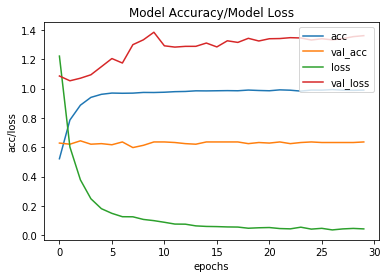

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy/Model Loss')
plt.ylabel('acc/loss')
plt.xlabel('epochs')
plt.legend(('acc','val_acc', 'loss', 'val_loss'), loc='upper right')
plt.savefig('test.jpg')
plt.show()

In [24]:
from tensorflow.keras.models import load_model

In [25]:
model=load_model('densenet_weights_7.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
prediction=model.predict(x_test)
evalution=model.evaluate(x_test, y_test)

264/264 [==============================] - 7s 25ms/sample - loss: 0.9791 - acc: 0.7083


In [27]:
np.argmax(prediction, axis=1)[10:20],np.argmax(y_test, axis=1)[10:20]

(array([0, 0, 0, 3, 0, 2, 0, 3, 2, 0], dtype=int64),
 array([0, 0, 0, 3, 2, 2, 0, 3, 2, 0], dtype=int64))

In [28]:
cf=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(prediction,axis=1))
cf

array([[153,   0,   2,   5],
       [ 13,   2,   0,   3],
       [ 24,   1,   8,   6],
       [ 14,   2,   7,  24]], dtype=int64)

In [29]:
normalized_cf=[]
for x in cf:
    normalized_cf.append(x/sum(x))

In [30]:
normalized_cf=np.array(normalized_cf)
normalized_cf

array([[0.95625   , 0.        , 0.0125    , 0.03125   ],
       [0.72222222, 0.11111111, 0.        , 0.16666667],
       [0.61538462, 0.02564103, 0.20512821, 0.15384615],
       [0.29787234, 0.04255319, 0.14893617, 0.5106383 ]])

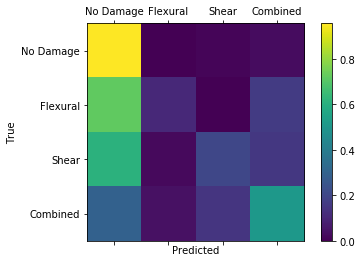

In [31]:
labels=['No Damage','Flexural','Shear','Combined']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(normalized_cf)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()